# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [5]:
#28X28 images are flattened and stored as an array of 784 pixel values
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.images.shape

(10000, 784)

In [9]:
mnist.validation.images.shape

(5000, 784)

In [10]:
mnist.train.images[100].shape

(784,)

In [11]:
mnist.train.images[1].min()

0.0

In [12]:
mnist.train.images[1].max()

1.0

### Visualizing the Data

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

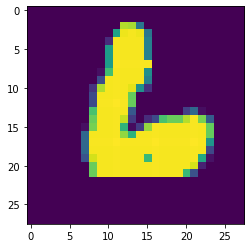

In [14]:
plt.imshow(mnist.train.images[3523].reshape(28,28))

In [15]:
batch_x , batch_y = mnist.train.next_batch(5000)

In [16]:
batch_x.shape

(5000, 784)

In [17]:
batch_y.shape

(5000, 10)

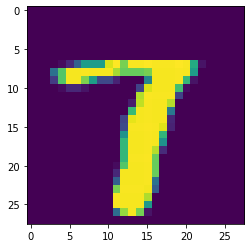

In [18]:
plt.imshow(batch_x[1235].reshape(28,28))

In [19]:
batch_y[1235]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [20]:
print(batch_y[1235].argmax())

7


## Create the Model

In [21]:
#Input Layer

In [22]:
#placeholder to read and feed images at run time
x = tf.placeholder(tf.float32,shape=[None,784])

#placeholde to feed the labels at runtime
y_true = tf.placeholder(tf.float32,[None,10])

In [ ]:
#Hidden Layer of 10 neurons

In [23]:
# 10 sets of 784 weights
W = tf.Variable(tf.zeros([784,10]))

#10 biases - one for each neuron
b = tf.Variable(tf.zeros([10]))

# Net input function
I = tf.matmul(x,W) + b 

#activation function - Softmax
Output=tf.nn.softmax(I)

Loss and Optimizer

In [24]:
#define loss function

In [25]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=Output)
loss_function = tf.reduce_mean(individual_loss)

In [26]:
#optimize the loss using gradient descent optimizer

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [28]:
train = optimizer.minimize(loss_function)

### Create Session

In [29]:
init = tf.global_variables_initializer()

In [30]:
sess=tf.Session()
sess.run(init)

In [59]:
#training
for step in range(10000):
        
        batch_x , batch_y = mnist.train.next_batch(200)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [60]:
#pass the test data through the model
#NOTE: There will be no iteration for test 
predict=sess.run(Output,feed_dict={x:mnist.test.images})

In [61]:
#output of 10,000 images
#predict.shape

In [62]:
#argmax will give the predicted value in terms of a number 
result=sess.run(tf.argmax(predict,1))

In [63]:
#predicted values
result

array([1, 5, 3, ..., 5, 5, 0], dtype=int64)

In [64]:
#same way get the label value using argmax
label_number=tf.argmax(mnist.test.labels,1)
labels=sess.run(label_number)

In [65]:
labels

array([1, 5, 3, ..., 5, 5, 0], dtype=int64)

In [66]:
accuracy_score(result,labels)

0.9263

In [67]:
confusion_matrix(result,labels)

array([[ 961,    0,   15,    3,    2,   11,   11,    3,    3,   12],
       [   0, 1104,    1,    0,    2,    3,    3,    7,    4,    5],
       [   2,    3,  918,   24,    4,    4,    4,   27,    4,    3],
       [   2,    4,    9,  920,    0,   29,    2,    5,   16,   11],
       [   1,    1,   16,    1,  925,   12,    8,    8,    9,   28],
       [   1,    2,    3,   22,    0,  764,   11,    0,   18,   13],
       [  10,    4,   12,    3,   12,   13,  915,    0,   11,    0],
       [   1,    2,   13,   10,    2,   11,    1,  952,   14,   15],
       [   2,   15,   37,   18,    4,   37,    3,    5,  894,   12],
       [   0,    0,    8,    9,   31,    8,    0,   21,    1,  910]],
      dtype=int64)

In [68]:
#Run inference to test the model 

In [69]:
#test with a single image
#fetch one image
test_image,test_label=mnist.test.next_batch(1) 

In [70]:
#type(test_image)

In [71]:
#run inference    

predicted_number=tf.argmax(Output,1)
print("Predicted Number:")
print(sess.run(predicted_number,feed_dict={x:test_image}))

Predicted Number:
[3]


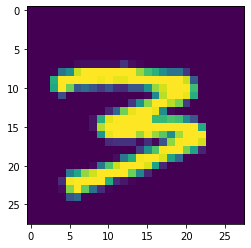

In [72]:
#display the image
plt.imshow(test_image.reshape(28,28))